<a href = 'https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py' style='font-size:30px'>matplotlib.org: Artist</a>

There are two types of Artists: `primitives` and `containers`.  
The primitives represent the standard graphical objects we want to paint onto our canvas: **Line2D**, **Rectangle**, **Text**, **AxesImage**, etc.  
The containers are places to put them (**Axis**, **Axes** and **Figure**).  
The standard use is to create a **Figure** instance, use the Figure to create one or more **Axes** or **Subplot** instances(**subplot** is a subclass of **Axes**), and use the **Axes** instance helper methods to create the primitives. 

In [1]:
import matplotlib.pyplot as plt

In [12]:
import numpy as np

# Customize your object

Every element in the figure is represented by a matplotlib **`Artist`**, and each has an extensive list of properties to configure its appearance. 

```python
Each of the properties is accessed with an old-fashioned setter or getter 
e.g:
Artist.get_alpha()
Artist.set_alpha(0.5)
```

```python
Set multiple properties:
e.g
Artist.set(alpha = 0.5, zorder = 2)
```

figure's facecolor: (1.0, 1.0, 1.0, 0.0)
Axes's edgecolor (1.0, 1.0, 1.0, 1.0)


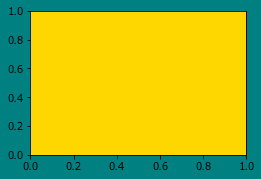

In [2]:
fig = plt.figure()
ax = fig.add_axes([0.25, 0.25, 0.5, 0.5])
print('figure\'s facecolor:', fig.get_facecolor())
fig.set_facecolor('teal')
print('Axes\'s edgecolor', ax.get_facecolor())
ax.set_facecolor('gold')

# Object Container

Now that we know how to inspect and set the properties of a given object we want to configure, we need to know how to get at that object. As mentioned in the introduction, there are two kinds of objects: primitives and containers. The primitives are usually the things you want to configure (the font of a `Text` instance, the width of a L`ine2D`) although the containers also have some properties as well -- for example the `Axes` Artist is a container that contains many of the primitives in your plot, but it also has properties like the `xscale` to control whether the xaxis is 'linear' or 'log'. In this section we'll review where the various container objects store the Artists that you want to get at.

### Figure Container

<table>
<tr><th>Figure attribute</th><th>	Description</th></tr>
<tr><td>axes</td><td>	A list of Axes instances (includes Subplot)</td></tr>
<tr><td>patch	</td><td>The Rectangle background</td></tr>
<tr><td>images</td><td>	A list of FigureImage patches - useful for raw pixel display</td></tr>
<tr><td>legends	</td><td>A list of Figure Legend instances (different from Axes.legends)</td></tr>
<tr><td>lines	</td><td>A list of Figure Line2D instances (rarely used, see Axes.lines)</td></tr>
<tr><td>patches</td><td>	A list of Figure patches (rarely used, see Axes.patches)</td></tr>
<tr><td>texts	</td><td>A list Figure Text instances</td></tr>
</table>

In [13]:
x = np.linspace(-10, 10, 1000)
y = np.sinc(x)

patch: Rectangle(xy=(0, 0), width=1, height=1, angle=0)
Axes container: [<matplotlib.axes._axes.Axes object at 0x0000021C2AA31B38>, <matplotlib.axes._axes.Axes object at 0x0000021C2AC548D0>]
lines container: []


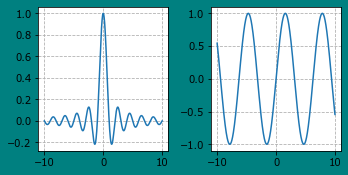

In [23]:
fig = plt.figure()

ax1 = fig.add_axes([0.1,0.25,0.3,0.5])
ax2 = fig.add_axes([0.5, 0.25, 0.3, 0.5])

ax1.plot(x, np.sinc(x))
ax2.plot(x, np.sin(x))
#recangle(the background of figure)
print('patch:', fig.patch)
fig.patch.set_facecolor('teal')
print('Axes container:', fig.axes) #container for Axes object

#container for lines
print('lines container:', fig.lines)

#turn on grid for Axes in the figure:
for ax in fig.axes:
    ax.grid(True, ls = '--')

### Axes container

<table>
<tr><th>Axes attribute</th><th>	Description</th></tr>
<tr><td>artists</td><td>	A list of Artist instances</td></tr>
<tr><td>patch</td><td>	Rectangle instance for Axes background</td></tr>
<tr><td>collections	</td><td>A list of Collection instances</td></tr>
<tr><td>images</td><td>	A list of AxesImage</td></tr>
<tr><td>legends</td><td>	A list of Legend instances</td></tr>
<tr><td>lines	</td><td>A list of Line2D instances</td></tr>
<tr><td>patches</td><td>	A list of Patch instances</td></tr>
<tr><td>texts</td><td>	A list of Text instances</td></tr>
<tr><td>xaxis</td><td>	matplotlib.axis.XAxis instance</td></tr>
<tr><td>yaxis</td><td>	matplotlib.axis.YAxis instance</td></tr>
</table>

line container: [<matplotlib.lines.Line2D object at 0x0000021C2AA9FA58>, <matplotlib.lines.Line2D object at 0x0000021C2AEC5E80>]
Rect: Rectangle(xy=(0, 0), width=1, height=1, angle=0)
XAxis: XAxis(54.000000,36.000000)
YAXis: YAxis(54.000000,36.000000)


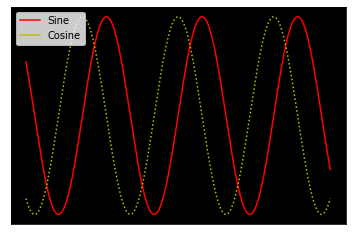

In [38]:
fig, ax = plt.subplots()
line1, line2 = ax.plot(x, np.sin(x), 'r', x, np.cos(x), 'y')
ax.legend(handles=(line1, line2), labels = ('Sine', 'Cosine'))

#container for lines
print('line container:', ax.lines)
ax.lines[0].set_linestyle('-')
ax.lines[1].set_linestyle(':')

#rectangle background
print('Rect:', ax.patch)
ax.patch.set_facecolor('k')

#xaxis object
print('XAxis:', ax.xaxis)
ax.xaxis.set_visible(False)
#yaxis object
print('YAXis:', ax.yaxis)
ax.yaxis.set_visible(False)

### Axis container 

<table>
<tr><th>Accessor method</th><th> Description</th></tr>
    <tr><td>get_scale</td><td>	The scale of the axis, e.g., 'log' or 'linear'</td></tr>
    <tr><td>get_view_interval</td><td>	The interval instance of the axis view limits</td></tr>
    <tr><td>get_data_interval</td><td>	The interval instance of the axis data limits</td></tr>
    <tr><td>get_gridlines	</td><td>A list of grid lines for the Axis</td></tr>
    <tr><td>get_label	</td><td>The axis label - a Text instance</td></tr>
    <tr><td>get_ticklabels</td><td>	A list of Text instances - keyword minor=True|False</td></tr>
    <tr><td>get_ticklines</td><td>	A list of Line2D instances - keyword minor=True|False</td></tr>
    <tr><td>get_ticklocs</td><td>	A list of Tick locations - keyword minor=True|False</td></tr>
<tr><td>get_major_locator</td><td>	The ticker.Locator instance for major ticks
    <tr><td>get_major_formatter</td><td>	The ticker.Formatter instance for major ticks</td></tr>
    <tr><td>get_minor_locator</td><td>	The ticker.Locator instance for minor ticks</td></tr>
    <tr><td>get_minor_formatter	</td><td>The ticker.Formatter instance for minor ticks</td></tr>
    <tr><td>get_major_ticks</td><td>	A list of Tick instances for major ticks</td></tr>
    <tr><td>get_minor_ticks	</td><td>A list of Tick instances for minor ticks</td></tr>
    <tr><td>grid</td><td>	Turn the grid on or off for the major or minor ticks</td></tr>
</table>

The **`matplotlib.axis.Axis`** instances handle:
* the drawing of the tick lines 
* the grid lines 
* the tick labels
* the axis label. 

 **`Locator`** and **`Formatter`**: control where the ticks are placed and how they are represented as strings.

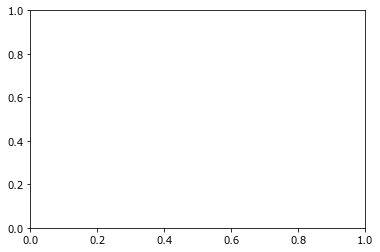

In [39]:
fig, ax = plt.subplots()

In [40]:
ax.xaxis.get_ticklocs() #get the positions of ticks on the xaxis

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [41]:
ax.xaxis.get_ticklines()

<a list of 12 Line2D ticklines objects>

In [44]:
ax.xaxis.get_ticklabels(which = 'major') #get major tick labels

<a list of 6 Text major ticklabel objects>

In [46]:
ax.xaxis.get_ticklabels(which = 'minor') #get minor tick labels

<a list of 0 Text minor ticklabel objects>

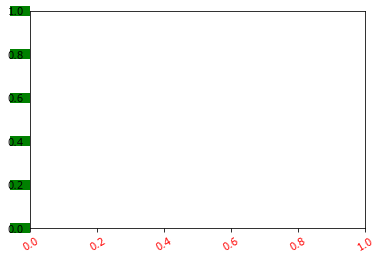

In [57]:
#customize using OOP
fig, ax = plt.subplots()

for label in ax.xaxis.get_ticklabels():
    label.set_color('r')
    label.set_rotation(30)
    
for line in ax.yaxis.get_ticklines():
    line.set_color('g')
    line.set_markersize(20)
    line.set_markeredgewidth(10)